Text(0.5, 1.0, '$SPY Price Position over Time')

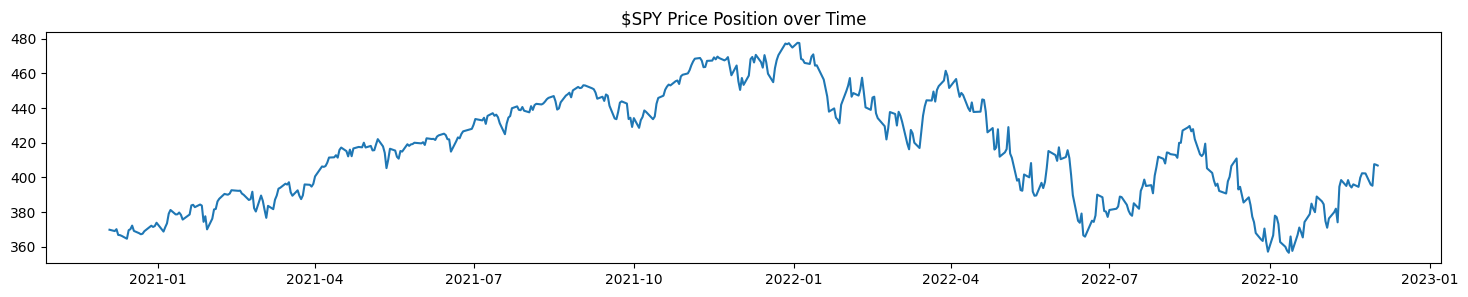

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker="SPY"

df = pd.read_csv(f"{ticker}HistoricalData.csv")
#print(df)

prices = np.array(df["c"])
#print(prices)

price_velocity = np.diff(prices)
#print(price_velocity)

price_accel = np.diff(price_velocity)
#print(price_accel)

price_jerk = np.diff(price_accel)
#print(price_jerk)

plt.rcParams["figure.figsize"] = (18, 3)
timestamps = pd.to_datetime(df["day"])
plt.plot(timestamps, prices)
    
plt.title(f"${ticker} Price Position over Time")


Text(0.5, 1.0, '$SPY Price Velocity over Time')

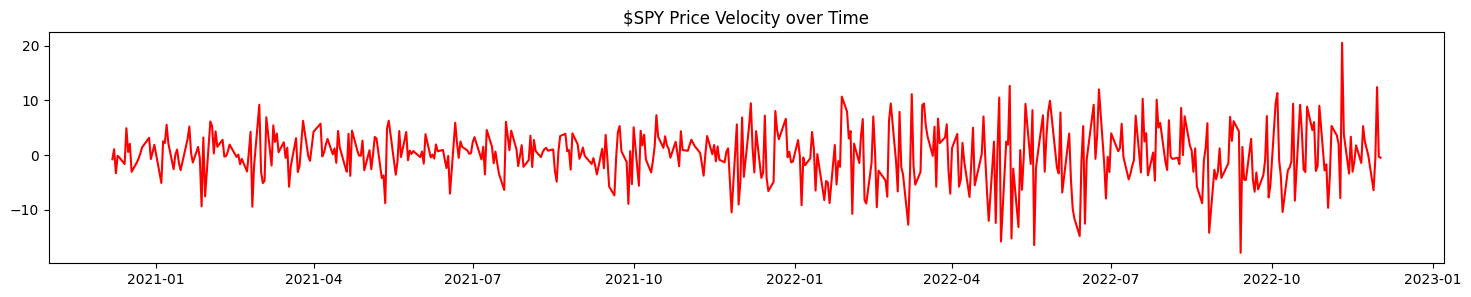

In [26]:
plt.plot(timestamps[1:], price_velocity, color="red")
plt.title(f"${ticker} Price Velocity over Time")

Text(0.5, 1.0, '$SPY Price Acceleration over Time')

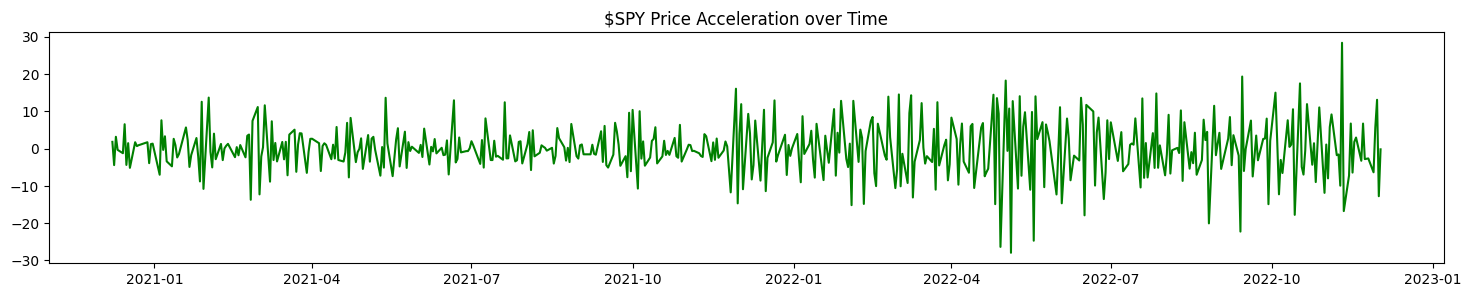

In [25]:
plt.plot(timestamps[2:], price_accel, color="green")
plt.title(f"${ticker} Price Acceleration over Time")

Text(0.5, 1.0, '$SPY Price Jerk over Time')

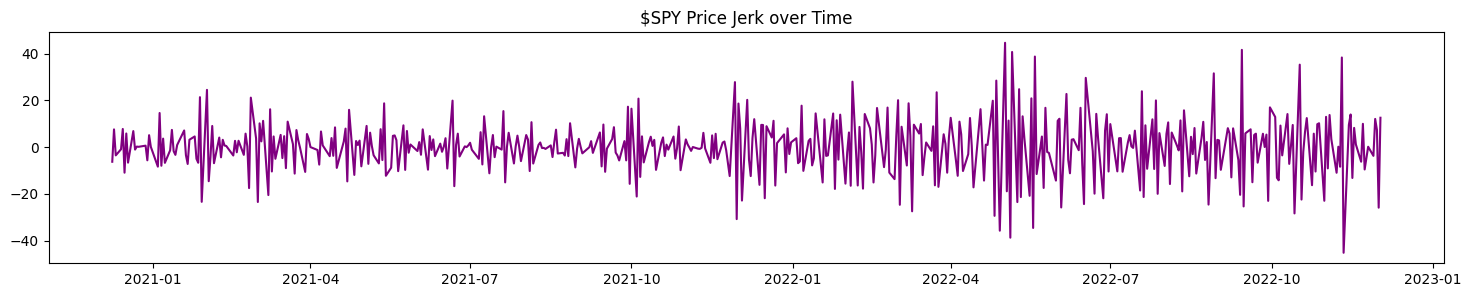

In [34]:

plt.plot(timestamps[3:], price_jerk, color="purple")
plt.title(f"${ticker} Price Jerk over Time")


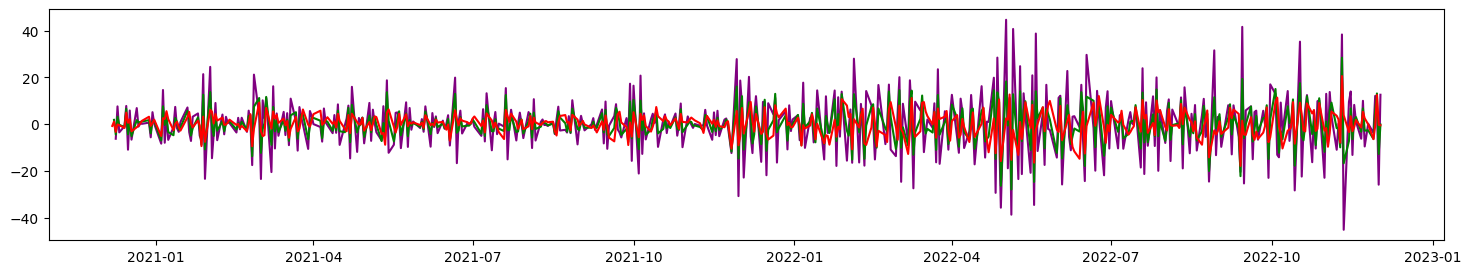

In [35]:
plt.plot(timestamps[3:], price_jerk, color="purple")
plt.plot(timestamps[2:], price_accel, color="green")
plt.plot(timestamps[1:], price_velocity, color="red")